In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import mpl_toolkits.axisartist as AA
font1 = {'family': 'SimSun', 'size':'small', 'weight': 'normal'}
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
d=pd.DataFrame()
for i in range(5):
    d1=pd.read_csv(os.path.join(os.getcwd(),"速度爬取","speed_on_"+str(i)+".csv"),index_col=0,header=0)
    d=pd.concat([d,d1])
d=d.reset_index()
name=[i for i in range(13)]
d["name"]=name*(d["name"].count()//len(name))

d.loc[:,"speed"]+=[np.random.randint(-3,5) for i in range(d.shape[0])]
dt=d[d["speed"]<5].copy()
dt.loc[:,"speed"]=[np.random.randint(0,5) for i in range(d[d["speed"]<5].shape[0])]
d[d["speed"]<5]=dt

In [3]:
d2=pd.DataFrame()
for i in range(5):
    d1=pd.read_csv(os.path.join(os.getcwd(),"速度爬取","speed_in_"+str(i+5)+".csv"),index_col=0,header=0)
    d2=pd.concat([d2,d1])
d2=d2.reset_index()
name=[12-i for i in range(13)]
d2["name"]=name*(d2["name"].count()//len(name))

d2.loc[:,"speed"]+=[np.random.randint(-5,5) for i in range(d2.shape[0])]
dt=d2[d2["speed"]<5].copy()
dt.loc[:,"speed"]=[np.random.randint(0,5) for i in range(d2[d2["speed"]<5].shape[0])]
d2[d2["speed"]<5]=dt

In [4]:
name=[i for i in range(13)]

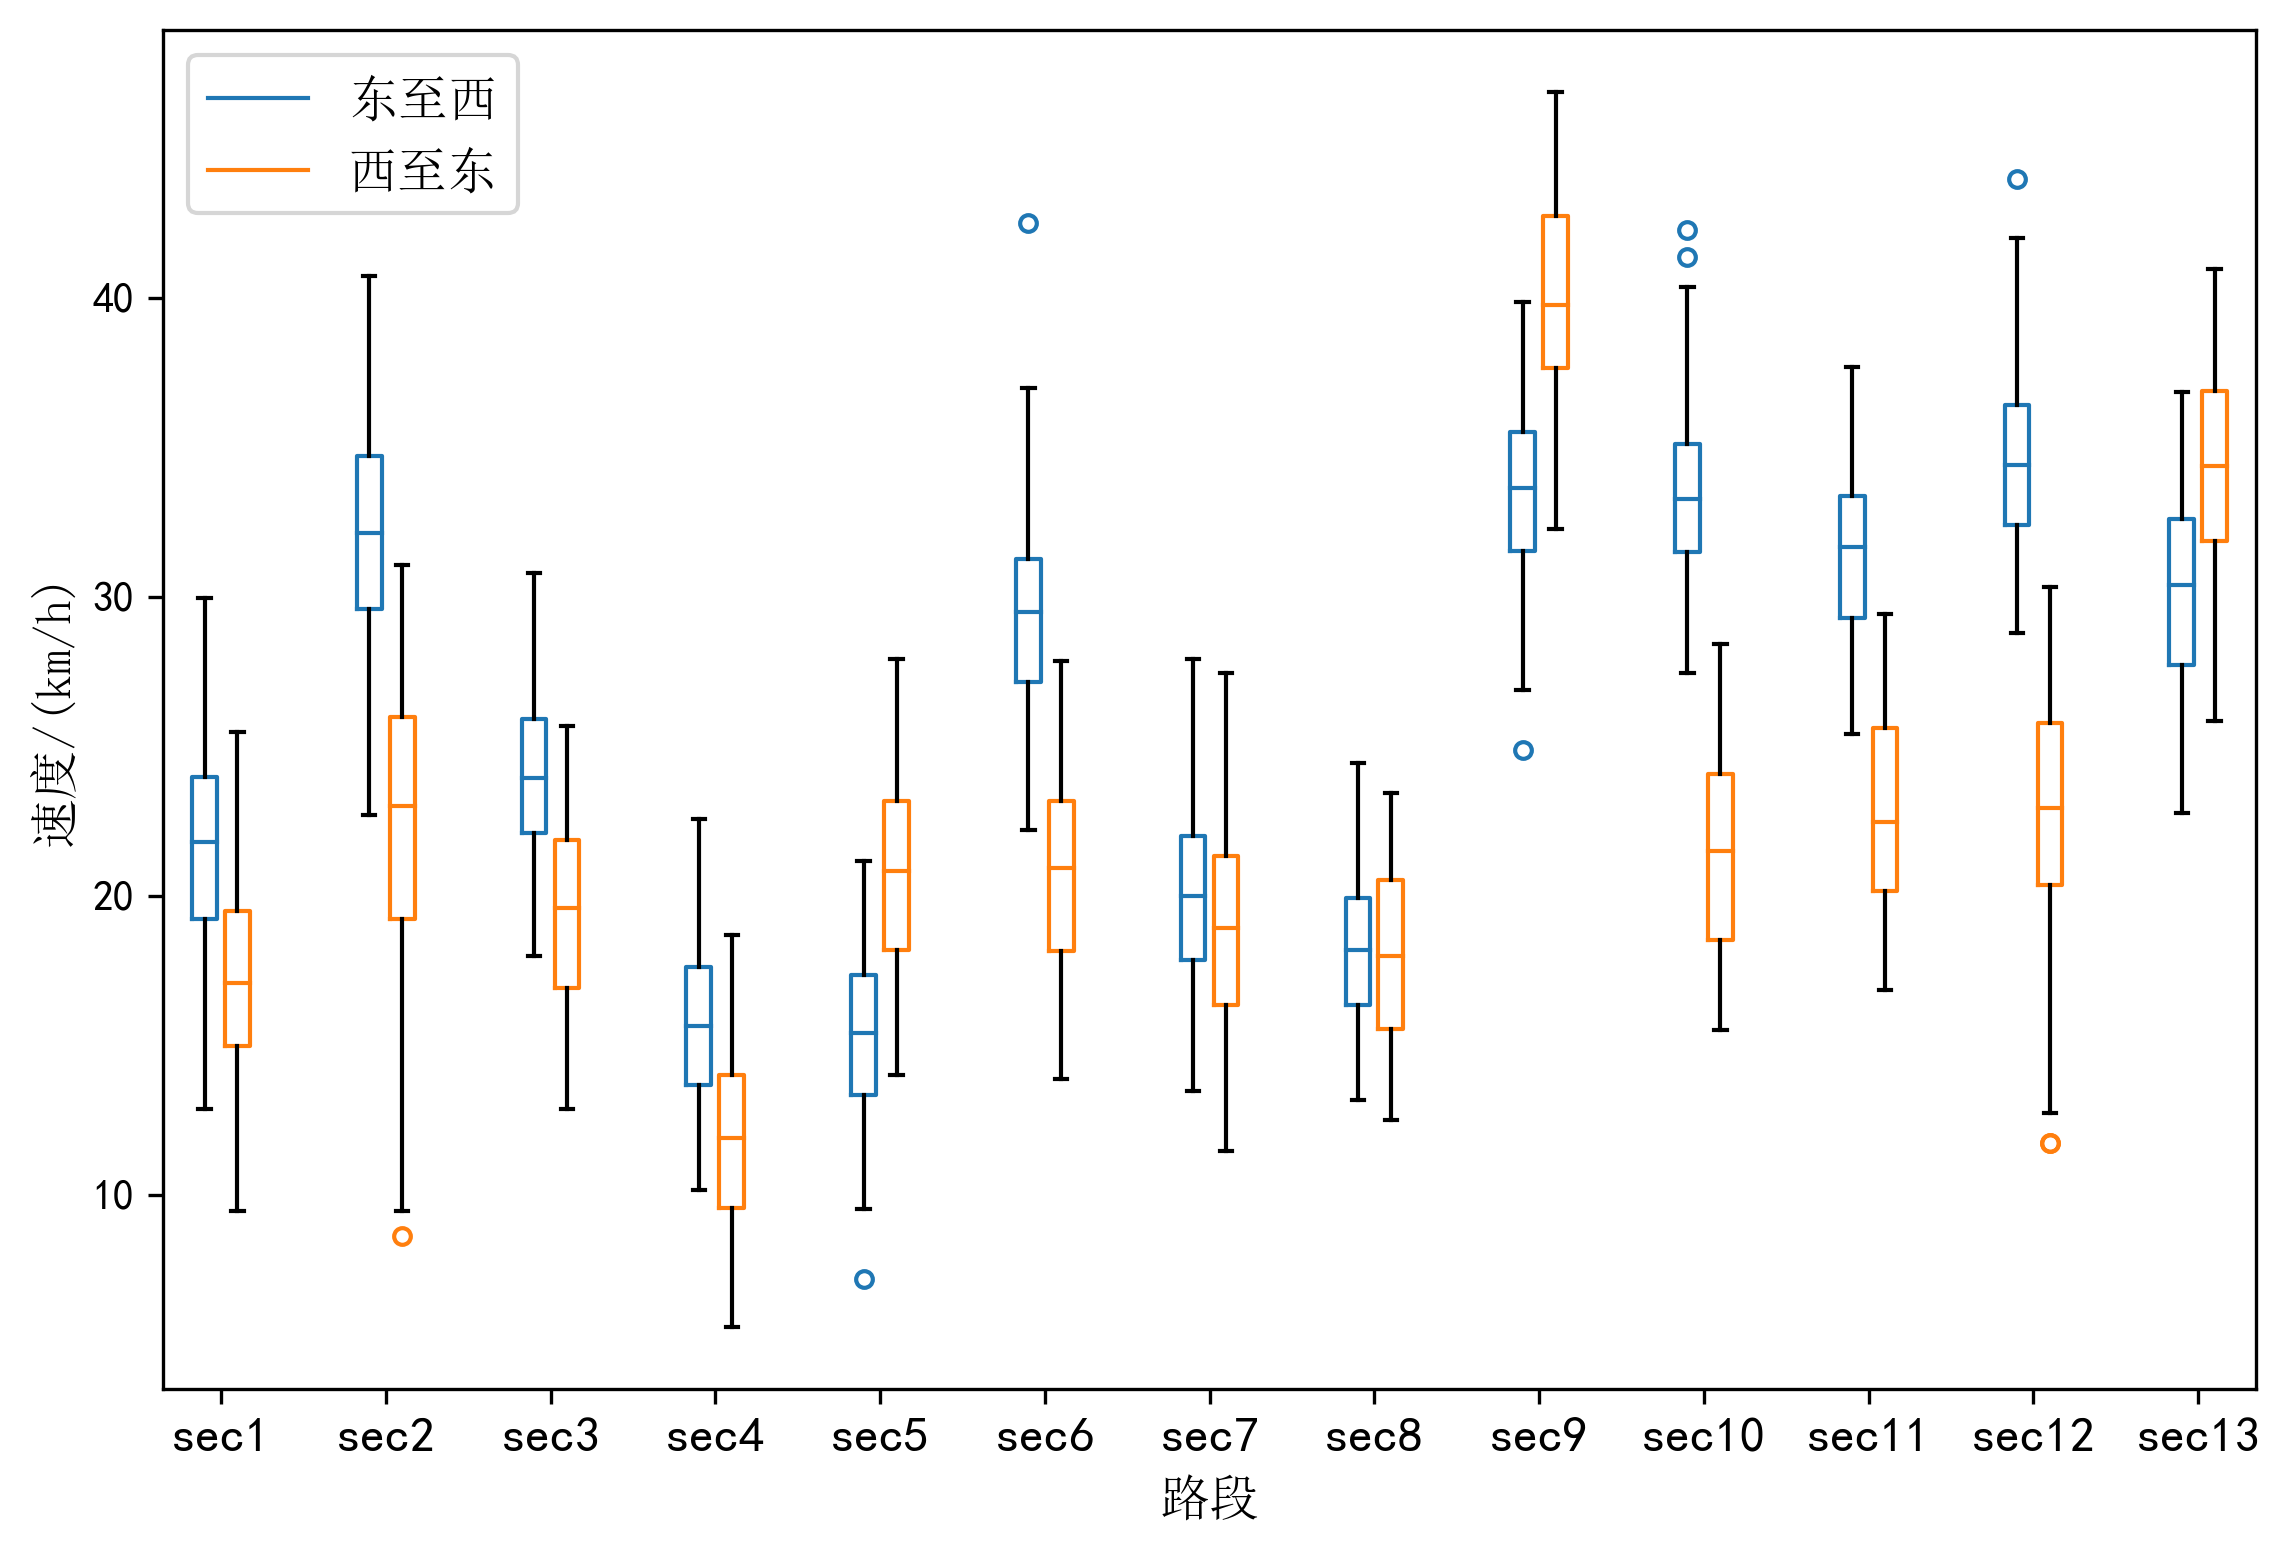

In [6]:
font1 = {'family': 'SimSun', 'weight': 'normal','size':12}
fig1=plt.figure(figsize=(9,6),dpi=300)
ax=fig1.add_subplot(111)
box1=ax.boxplot([d[d["name"]==i]["speed"] for i in range(13)],widths=0.3,boxprops={"color":'#1f77b4'},
           positions=[i*2+1-0.2 for i in name],flierprops={"markersize":4,"markeredgecolor":'#1f77b4'},
           medianprops={"color":"#1f77b4"})

box2=ax.boxplot([d2[d2["name"]==i]["speed"] for i in range(13)],widths=0.3,boxprops={"color":'#ff7f0e'},
           positions=[i*2+1+0.2 for i in name],flierprops={"markersize":4,"markeredgecolor":'#ff7f0e'},
           medianprops={"color":"#ff7f0e"})
# ax.legend(legends,labels,framealpha=0,prop=font1,bbox_to_anchor=(.02, 0.75, 1., .102),ncol=2,mode="expand", borderaxespad=0.)
#通过set_visible方法设置绘图区的顶部及右侧坐标轴隐藏
# fig1.gca().add_artist(l)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_title('(b) 干道不同路段的车辆速度概率分布图',fontsize=14,y=-0.22)
ax.legend([box1['boxes'][1],box2['boxes'][1]],["东至西","西至东"],fontsize='small',prop=font1)
ax.set_xlabel('路段',font1)
ax.set_ylabel('速度/(km/h)',font1)
ax.set_xticks([k*2+1 for k in name],["sec"+str(name[i]+1) for i in range(len(name))],fontsize=font1["size"])
plt.show()
fig1.tight_layout()#调整整体空白
fig1.savefig( "F:\\workspace\\jupyter\\论文\\graduation thesis\\pictures\\箱型图",bbox_inches='tight')

In [7]:
for i in name:
    dx=d[d["name"]==i].copy()
    ds=dx.loc[:,"speed"].copy()
    d1_up = ds.quantile(0.75)
    d1_low = ds.quantile(0.25)
    ds[(ds>=(d1_up-d1_low)*1.5+d1_up)|(ds<=d1_low-(d1_up-d1_low)*1.5)]=np.nan
    ds.fillna(ds.median(),inplace=True)
    dx.loc[:,"speed"]=ds
    d[d["name"]==i]=dx
for i in name:
    dx=d2[d2["name"]==i].copy()
    ds=dx.loc[:,"speed"].copy()
    d1_up = ds.quantile(0.75)
    d1_low = ds.quantile(0.25)
    ds[(ds>=(d1_up-d1_low)*1.5+d1_up)|(ds<=d1_low-(d1_up-d1_low)*1.5)]=np.nan
    ds.fillna(ds.median(),inplace=True)
    dx.loc[:,"speed"]=ds
    d2[d2["name"]==i]=dx

In [8]:
def func(x,mu,sigma,N,D):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))*N

In [9]:
def get_percent(data_x):
    area_list=np.array([[0,5],[5,10],[10,15],[15,20],[20,25],[25,30],[30,35],[35,40],[40,45],[45,50]])
    area_list=pd.DataFrame(area_list)
    area_list.columns=['ls','us']
    temp=list()
    for each in area_list.iterrows():
        temp.append(data_x[(data_x['speed']>each[1]['ls'])&(data_x['speed']<each[1]['us'])]['speed'].count())
    area_list['count']=np.array(temp)
    area_list['prop']=area_list['count']/area_list['count'].sum()
    area_list['ave']=(area_list['ls']+area_list['us'])/2
    return area_list

In [10]:
dh=pd.DataFrame()
for i in name:
    dx=d[d["name"]==i]
    area_list=get_percent(dx)
    dh=pd.concat([dh,area_list["count"]],axis=1)
dh=dh.T.reset_index(drop=True)
dh.columns=area_list["ave"]
dh=dh.T

In [11]:
dh2=pd.DataFrame()
for i in name:
    dx=d2[d2["name"]==i]
    area_list=get_percent(dx)
    dh2=pd.concat([dh2,area_list["count"]],axis=1)
dh2=dh2.T.reset_index(drop=True)
dh2.columns=area_list["ave"]
dh2=dh2.T

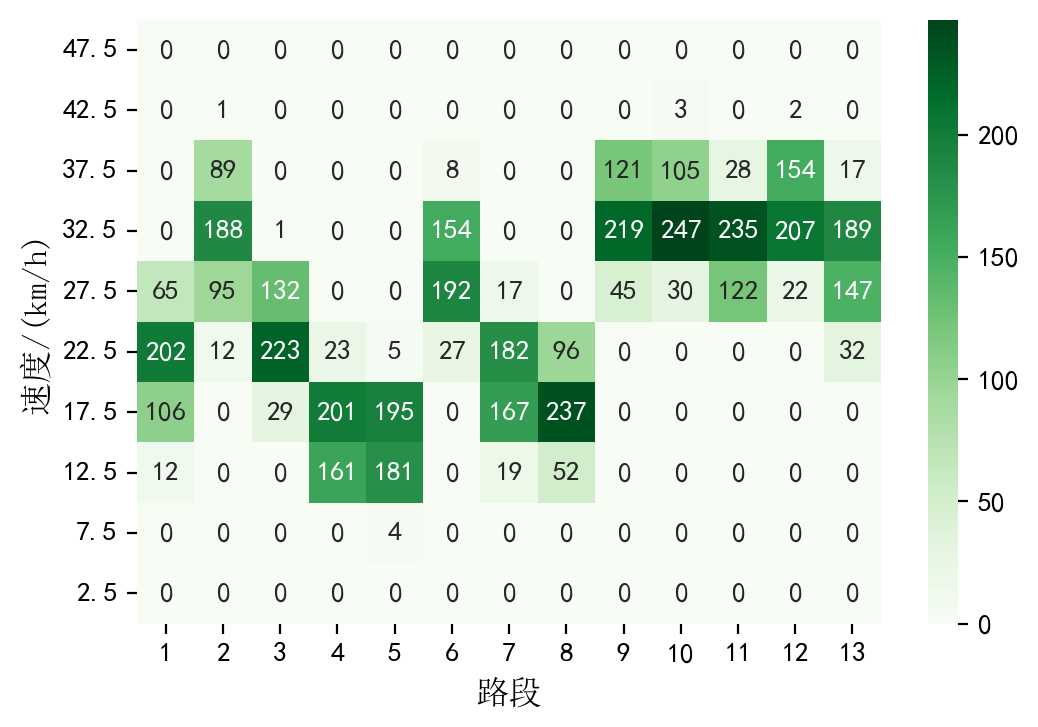

In [12]:
import seaborn as sns
import palettable#python颜色库
# from sklearn import datasets 

fig,ax=plt.subplots(dpi=200, figsize=(6,4))
sns.heatmap(dh[::-1],cmap=plt.get_cmap('Greens'),annot=True,fmt=".0f")
ax.set_xticklabels([str(i+1) for i in name])
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('路段',font1)
ax.set_ylabel('速度/(km/h)',font1)
plt.show()
fig.tight_layout()#调整整体空白
fig.savefig( "F:\\workspace\\jupyter\\论文\\graduation thesis\\pictures\\上行方向热力图",bbox_inches='tight')

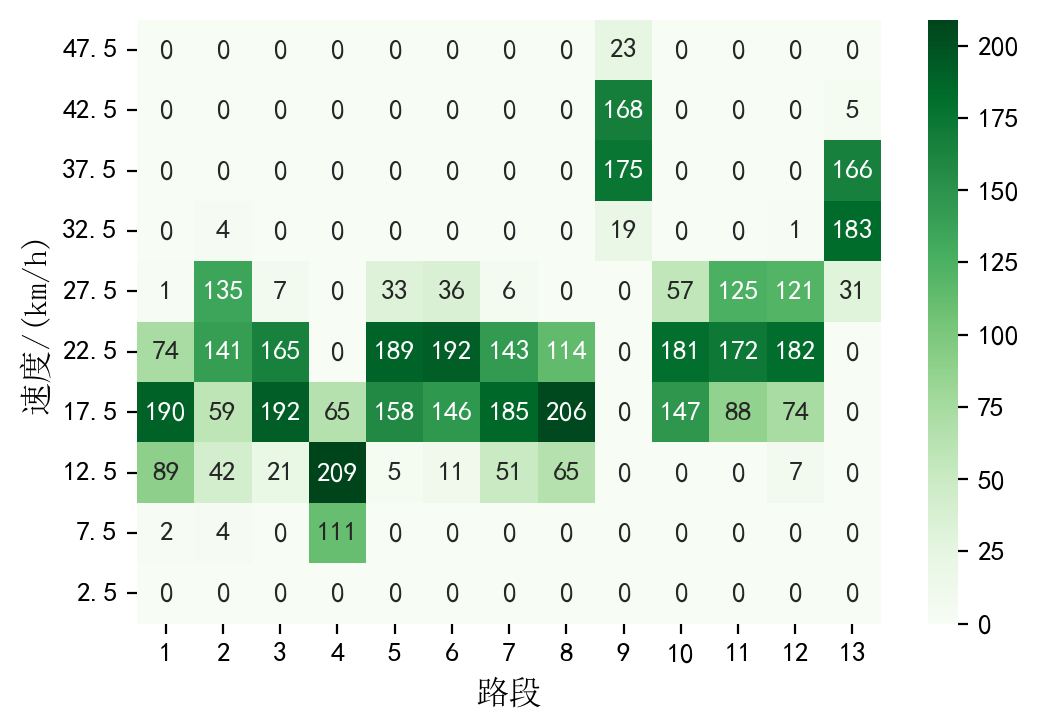

In [13]:
import seaborn as sns
import palettable#python颜色库
# from sklearn import datasets 

fig,ax=plt.subplots(dpi=200, figsize=(6,4))
sns.heatmap(dh2[::-1],cmap=plt.get_cmap('Greens'),annot=True,fmt=".0f")
ax.set_xticklabels([str(i+1) for i in name])
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('路段',font1)
ax.set_ylabel('速度/(km/h)',font1)
plt.show()
fig.tight_layout()#调整整体空白
fig.savefig( "F:\\workspace\\jupyter\\论文\\graduation thesis\\pictures\\下行方向热力图",bbox_inches='tight')

In [14]:
props=[]
for i in name:
    dx=d[d["name"]==i]
    area_list=get_percent(dx)
    propt,_=curve_fit(func,area_list['ave'],area_list['prop'],bounds=[0,[50.,20,1000,1000.]],maxfev=100000)
    props.append(propt)

In [15]:
props_in=[]
for i in name:
    dx=d2[d2["name"]==i]
    area_list=get_percent(dx)
    propt,_=curve_fit(func,area_list['ave'],area_list['prop'],bounds=[0,[50.,20,1000,1000.]],maxfev=100000)
    props_in.append(propt)

In [16]:
props_in

[array([ 17.23391319,   3.78668575,   5.10106316, 500.        ]),
 array([ 23.97700161,   4.62441583,   4.7718117 , 500.        ]),
 array([ 19.67988729,   3.15372403,   5.02593859, 500.        ]),
 array([ 11.77265754,   3.66811673,   5.12032328, 500.        ]),
 array([ 20.48854112,   3.41778345,   5.06131461, 500.        ]),
 array([ 20.71105017,   3.52741771,   5.03631569, 500.        ]),
 array([ 19.09815985,   3.81002482,   5.10746858, 500.        ]),
 array([ 18.2843144 ,   3.71234609,   5.12879276, 500.        ]),
 array([ 39.93235618,   3.44438823,   5.00588116, 500.        ]),
 array([ 20.91400496,   3.89290635,   5.15846099, 500.        ]),
 array([ 23.20017204,   4.41806606,   5.24943716, 500.        ]),
 array([ 23.32907754,   4.14502544,   5.1215638 , 500.        ]),
 array([ 34.69877594,   3.37600719,   5.04887977, 500.        ])]

In [17]:
dx=d[(d["name"])==9|(d["name"]==10)]
area_list=get_percent(dx)
propt,_=curve_fit(func,area_list['ave'],area_list['prop'],bounds=[0,[50.,20,1000,1000.]],maxfev=100000)

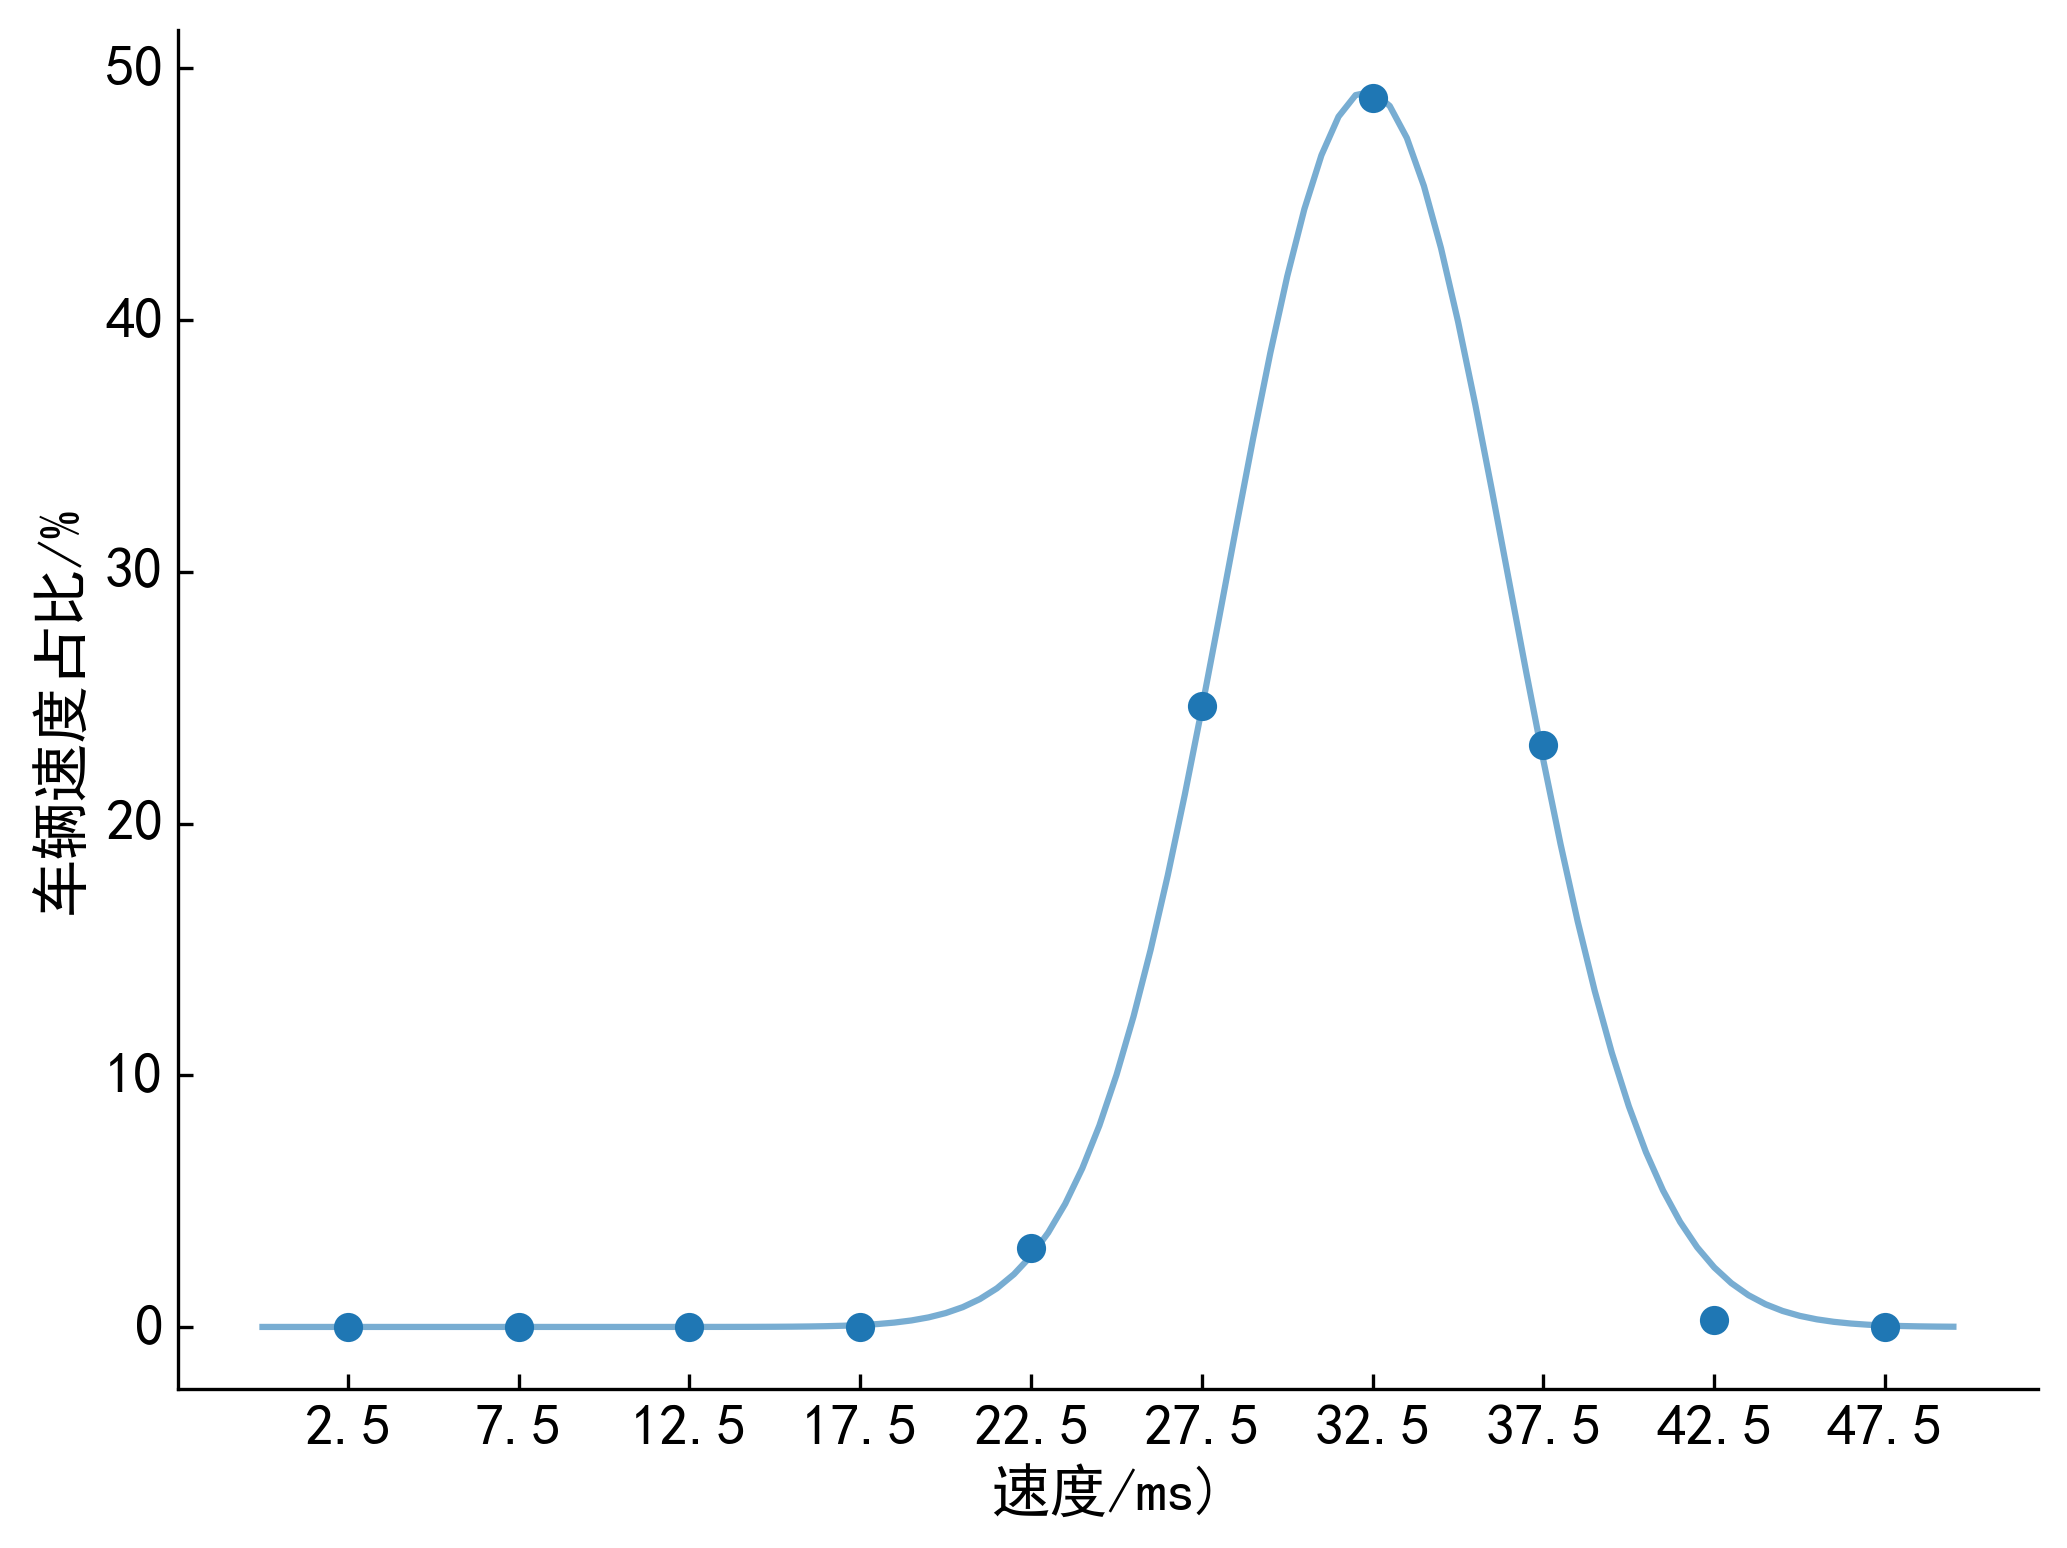

In [18]:
fig1=plt.figure(figsize=(8,6),dpi=300)
ax=AA.Subplot(fig1,111)
fig1.add_axes(ax)
linspace1=np.arange(0,50,0.5)

plt.scatter(area_list["ave"],area_list['prop']*100)
propt,propv=curve_fit(func,area_list['ave'],area_list['prop'],bounds=[0,[50,20,1000,1000.]],maxfev=100000)
legend,=plt.plot(linspace1,func(linspace1,*propt)*100,alpha=0.6)

ax.axis["top"].set_visible(False)
ax.axis["right"].set_visible(False)
# ax.set_title('(b) 干道不同路段的车辆速度概率分布图',fontsize=14,y=-0.22)
ax.set_xlabel('速度/ms)')
ax.set_ylabel('车辆速度占比/%')
ax.axis['left'].label.set_fontsize(14)
ax.axis['bottom'].label.set_fontsize(14)
ax.axis['left'].major_ticklabels.set_fontsize(14)
ax.axis['bottom'].major_ticklabels.set_fontsize(14)
ax.set_xticks(area_list['ave'])

plt.show()
fig1.tight_layout()#调整整体空白
# fig1.savefig( "F:\\workspace\\论文\\variable Speed\\curve_space_fit",bbox_inches='tight')


In [19]:
d[["name","speed"]].to_csv("./上行速度数据.csv")

In [20]:
d2[["name","speed"]].to_csv("./下行速度数据.csv")

In [21]:
a=False
for k in [1,2]:
    a|=d["name"]==k

d[a]

,index,date,time,name,origin,destination,distance,duration,speed
1,1,2023-03-07,21:12:54,1,"113.375752,22.519498","113.38199,22.519653",643,86,26.916279
2,2,2023-03-07,21:12:54,2,"113.383365,22.519686","113.386675,22.519707",344,57,23.726316
14,14,2023-03-07,21:13:25,1,"113.375752,22.519498","113.38199,22.519653",643,86,28.916279
15,15,2023-03-07,21:13:25,2,"113.383365,22.519686","113.386675,22.519707",344,54,26.933333
27,27,2023-03-07,21:13:57,1,"113.375752,22.519498","113.38199,22.519653",643,89,29.008989
...,...,...,...,...,...,...,...,...,...
4968,964,2023-03-08,00:31:41,2,"113.383365,22.519686","113.386675,22.519707",344,48,23.800000
4980,976,2023-03-08,00:32:12,1,"113.375752,22.519498","113.38199,22.519653",643,67,32.549254
4981,977,2023-03-08,00:32:12,2,"113.383365,22.519686","113.386675,22.519707",344,48,27.800000
4993,989,2023-03-08,00:32:43,1,"113.375752,22.519498","113.38199,22.519653",643,67,32.549254


In [22]:
p=np.array([0,0,0,0,1,0,0,1,0,0,0,1,0,0,0])

In [23]:
p=p.cumsum()+1

In [24]:
nx=[np.where(p==k)[0] for k in np.unique(p) ]

In [25]:
dx=d[(d["name"])==5|(d["name"]==6)]

In [29]:
d.groupby("name")["speed"].mean()

name
0     21.643663
1     32.058972
2     23.996858
3     15.724018
4     15.256098
5     29.385298
6     19.779803
7     18.120899
8     33.667991
9     33.479902
10    31.500023
11    34.247889
12    30.157781
Name: speed, dtype: float64

In [30]:
d2.groupby("name")["speed"].mean()

name
0     17.228646
1     22.188947
2     19.430474
3     11.809555
4     20.727834
5     20.767901
6     18.893493
7     18.062931
8     40.049992
9     21.412021
10    22.836887
11    23.097506
12    34.374107
Name: speed, dtype: float64